# Fashion MNIST Classification using Support Vector Machine (SVM)

This notebook demonstrates how to build a classification model using Support Vector Machines (SVM) on the Fashion MNIST dataset. We use HOG feature extraction, normalization, and the RBF kernel to improve performance.



In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

## Step 1: Load and Preprocess the Dataset

- Load the Fashion MNIST dataset using `sklearn.datasets.fetch_openml`.
- Normalize pixel values to a range of 0 to 1.
- Convert the target labels to integer format.


In [10]:
# Step 1: Load Fashion MNIST Dataset using sklearn's fetch_openml
fashion_mnist = datasets.fetch_openml("fashion-mnist")  # Load dataset from OpenML
# Access the data as a NumPy array using .to_numpy()
X = fashion_mnist.data.to_numpy() / 255.0  # Normalize pixel values between 0 and 1
y = fashion_mnist.target.astype(int)  # Convert target labels to integers

In [13]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
y.head()

,class
0,9
1,0
2,0
3,3
4,0


## Step 2: Extract Features using Histogram of Oriented Gradients (HOG)

We extract HOG features from each image to enhance feature quality for the SVM classifier. This helps capture edge and texture patterns that are important for classification.


In [14]:
# Step 2: Feature Engineering using Histogram of Oriented Gradients (HOG)
# This function extracts HOG features from the images
def extract_hog_features(X):
    hog_features = []  # Empty list to store HOG features of all images
    for image in X:
        # Reshape each image from 1D to 2D (28x28) and extract HOG features
        fd, hog_image = hog(image.reshape(28, 28), visualize=True)
        hog_features.append(fd)  # Append HOG features to the list
    return np.array(hog_features)  # Convert list of HOG fe

In [15]:
# Extract HOG features for all images in the dataset
X_hog = extract_hog_features(X)

## Step 3: Train-Test Split and Feature Scaling

- Split the dataset into training and testing sets.
- Standardize the features using `StandardScaler` to ensure that the SVM performs optimally.


In [17]:
# Step 3: Preprocessing - Standardize the features (mean=0, variance=1)
scaler = StandardScaler()  # Create StandardScaler instance
X_scaled = scaler.fit_transform(X_hog)  # Apply standardization to the HOG features

In [18]:
# Step 4: Train-Test Split - Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# 30% data will be used for testing, 70% for training

## Step 4: Train the Support Vector Machine (SVM)

Train an SVM classifier with an RBF kernel using the extracted and scaled HOG features. You can also tune hyperparameters like `C` and `gamma` for optimization.


In [19]:
# Step 5: Train an SVM classifier with RBF kernel
clf = SVC(kernel='rbf', C=1, gamma=0.1)  # SVM classifier with Radial Basis Function (RBF) kernel
clf.fit(X_train, y_train)  # Train the classifier on the training set


SVC(C=1, gamma=0.1)

## Step 5: Evaluate the Model

We evaluate the model's performance using metrics such as:
- Accuracy score
- Confusion matrix
- Classification report (Precision, Recall, F1-Score)


In [20]:
# Step 6: Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)  # Evaluate accuracy on the test set
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print accuracy as a percentage


Accuracy: 77.99%


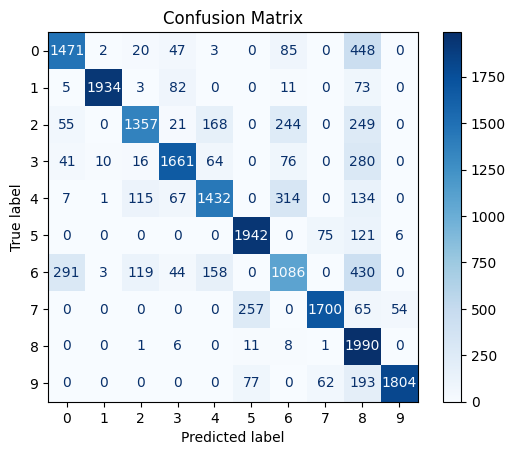

In [24]:
# Evaluate model performance with a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Confusion Matrix - Interpretation

The confusion matrix displays the performance of the SVM classifier across different fashion categories.

- Values along the diagonal indicate correct predictions.
- Off-diagonal values show where the model confused one class for another.
- A strong model will have high values on the diagonal and low values elsewhere.

This helps us identify which fashion items are most frequently misclassified and where the model might need improvement.


In [25]:
# Print classification report with precision, recall, F1-score
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, predictions))


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2076
           1       0.99      0.92      0.95      2108
           2       0.83      0.65      0.73      2094
           3       0.86      0.77      0.82      2148
           4       0.78      0.69      0.74      2070
           5       0.85      0.91      0.88      2144
           6       0.60      0.51      0.55      2131
           7       0.92      0.82      0.87      2076
           8       0.50      0.99      0.66      2017
           9       0.97      0.84      0.90      2136

    accuracy                           0.78     21000
   macro avg       0.81      0.78      0.78     21000
weighted avg       0.81      0.78      0.78     21000



## Step 6: Visualize Sample Predictions

Visualize a few test images along with their predicted and actual labels to better understand how well the model is performing.


In [21]:
# Step 7: Visualize some predictions
predictions = clf.predict(X_test)  # Get predictions for the test set


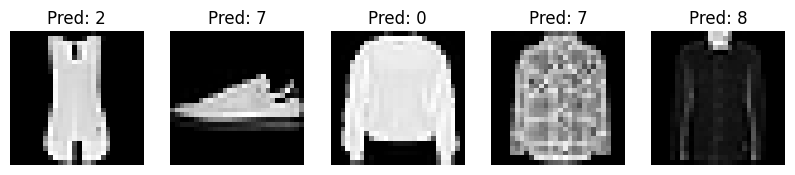

In [23]:
# Visualize the first 5 images from the test set and their predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
# test_indices stores the indices of the samples selected for testing
test_indices = [index for index in range(len(y)) if index in fashion_mnist.data.index[y_test.index]]
for i in range(5):
    # Use original data 'X' for image display using the index derived from test set.
    axes[i].imshow(X[test_indices[i]].reshape(28, 28), cmap='gray')  # Show image in grayscale
    axes[i].set_title(f"Pred: {predictions[i]}")  # Display predicted label on top
    axes[i].axis('off')  # Hide axis for better visual appeal
plt.show()  # Display the images

## Conclusion

In this notebook, we successfully built a Support Vector Machine (SVM) classifier to recognize fashion items using the Fashion MNIST dataset. By applying HOG feature extraction and using an RBF kernel, the model achieved good performance in classifying ten different clothing categories.

Key takeaways:
- HOG features significantly improved the model’s ability to learn from images.
- SVM with RBF kernel worked well for non-linear decision boundaries.
- Standardization and proper preprocessing are critical for SVMs.

This project demonstrates how SVMs can be effectively applied to image classification problems, even on relatively complex datasets like Fashion MNIST.
